In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from skimage import color

In [4]:
import sys
sys.path.append('..')
from semantic_segmentation.semantic_segmentation_v0 import get_segmentation_mask

In [5]:
SIZE = 256

def grab_colors(img, n_colors=8, weights=(5, 100, 100, 1, 1), resize=False, blur=False):
    if resize:
        img = cv2.resize(img, (SIZE, SIZE))

    mask = get_segmentation_mask(img)
    mask = mask.reshape(-1)

    if blur:
        # blur image
        for _ in range(blur):
            img = cv2.GaussianBlur(img, (3, 3), 0)

    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    clt = KMeans(n_clusters=n_colors)

    # Get positional row/col channels to append to the points
    # Ex: [[0, 0, 0, 0], [1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]]
    row_channel = np.arange(img_hsv.shape[0]).reshape(-1, 1)
    row_channel = np.repeat(row_channel, img_hsv.shape[1], axis=1)
    col_channel = np.arange(img_hsv.shape[1]).reshape(1, -1)
    col_channel = np.repeat(col_channel, img_hsv.shape[0], axis=0)
    img_hsv = np.dstack((img_hsv, row_channel, col_channel))

    points = img_hsv.reshape(-1, 5)
    
    # apply mask
    points = points[mask.astype(bool)]

    print(f"before: {len(points)}")
    # th = np.percentile(points[:, 0], 25)
    th = np.percentile(points[:, 0], 2)
    points = points[points[:, 0] > th]
    print(f"after: {len(points)}")

    points = points * np.array(weights)
    labels = clt.fit_predict(points)
    cluster_weights = np.bincount(labels)
    cluster_weights = cluster_weights / cluster_weights.sum()
    closest_points = []
    centroids = clt.cluster_centers_
    for centroid in centroids:
        closest_points.append(points[np.argmin(np.linalg.norm(points - centroid, axis=1))])
    closest_points = np.array(closest_points) / np.array(weights)
    centroids = centroids / np.array(weights)
    return centroids, cluster_weights, closest_points

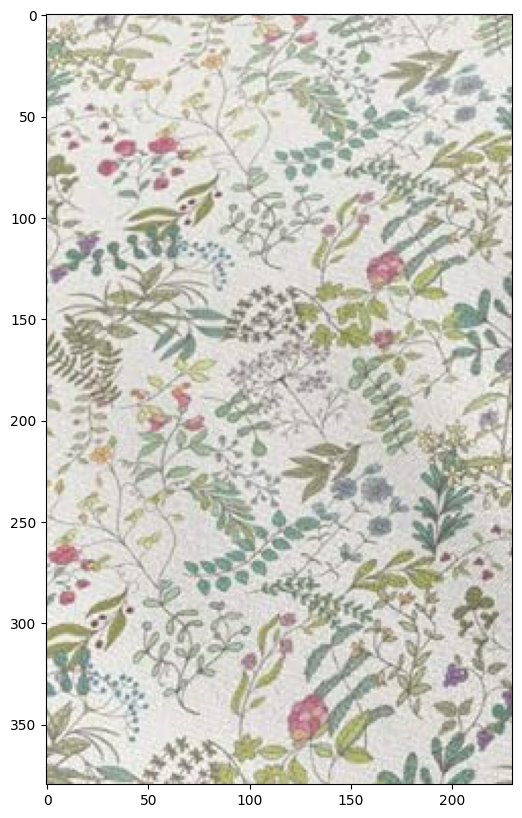

In [8]:
repo_dir = '/Users/sdale/repos/find_my_tie'

# path = 'dataset_v0/81fQJtHh72L._AC_SX679_.jpg'
# path = 'dataset_v0/91jUzDDrjwL._AC_SX679_.jpg'
# path = 'dataset_v0/81HluiLK2QL._AC_SX679_.jpg'
# path = 'dataset_v0/716Hfx3NNML._AC_SX679_.jpg'
# path = 'dataset_v0/712PqTe2AQL._AC_SX679_.jpg'
# path = 'dataset_v0/71lYM+aMhsL._AC_SY879_.jpg'
# path = 'dataset_v0/712bLFZl-VL._AC_SY879_.jpg'
# path = os.path.join(repo_dir, path)
# assert(os.path.exists(path))
# img = cv2.imread(path)
# red_img = img.copy()
# red_img = img[55:500, 215:450, :]

# path = 'dataset_v0/71m8ks70kwL._AC_SX679_.jpg'
# path = 'dataset_v0/71kCNxFLC1L._AC_SX679_.jpg'
# path = 'dataset_v0/81-tRxcnkkL._AC_SX679_.jpg'
# path = 'dataset_v0/81Mr2H57TWL._AC_SX679_.jpg'
# path = os.path.join(repo_dir, path)
# assert(os.path.exists(path))
# img = cv2.imread(path)
# red_img = img.copy()
# red_img = img[175:500, 140:380, :]

# path = 'dataset_v0/81aV7iiWfCL._AC_SX679_.jpg'
# path = os.path.join(repo_dir, path)
# assert(os.path.exists(path))
# img = cv2.imread(path)
# red_img = img.copy()
# red_img = img[50:450, 170:400, :]

# path = 'dataset_v0/81fXZ8mcP1L._AC_SX679_.jpg'
# path = 'dataset_v0/81h8agy4CUL._AC_SX679_.jpg'
# path = 'dataset_v0/71NB1wAbbDL._AC_SY879_.jpg'
# path = 'dataset_v0/81pKz43nWSL._AC_SX679_.jpg'
# path = 'dataset_v0/81DSZ5j2vqL._AC_SX679_.jpg'
# path = 'dataset_v0/81XMRLhUylL._AC_SX679_.jpg'
# path = 'dataset_v0/8145dIKwq8L._AC_SX679_.jpg'
# path = 'dataset_v0/71KQRJhWJWL._AC_SX679_.jpg'
# path = 'dataset_v0/71Sg0NNbxWL._AC_SX679_.jpg'
# path = 'dataset_v0/71RoY7OIqBL._AC_SX679_.jpg'
# path = 'dataset_v0/71ms6LPzQZL._AC_SX679_.jpg'
# path = 'dataset_v0/717APIxDREL._AC_SX679_.jpg'
# path = 'dataset_v0/71mTwp44yWL._AC_SX679_.jpg'
# path = 'dataset_v0/71r14VLy+ZL._AC_SX679_.jpg'
# path = 'dataset_v0/71gWVhMbQzL._AC_SX679_.jpg'
# path = 'dataset_v0/7106gTn0+fL._AC_SX679_.jpg'
# path = 'dataset_v0/71OCgLt+kiL._AC_SX679_.jpg'
# path = 'dataset_v0/71+Z4M7m8QL._AC_SX679_.jpg'
# path = 'dataset_v0/61MNHVfXRFL._AC_SX679_.jpg'
# path = 'dataset_v0/71EWZ-nSKAL._AC_SX679_.jpg'
# path = 'dataset_v0/71N+P5xVH-L._AC_SX679_.jpg'
# path = 'dataset_v0/714u0Of+RKL._AC_SX679_.jpg'
# path = 'dataset_v0/71N0ijILqWL._AC_SX679_.jpg'
# path = 'dataset_v0/71PWXMsBxRL._AC_SX679_.jpg'
path = 'dataset_v0/71iFkUVX1EL._AC_SX679_.jpg'
path = os.path.join(repo_dir, path)
assert(os.path.exists(path))
img = cv2.imread(path)
red_img = img.copy()
red_img = img[50:430, 170:400, :]

# path = 'dataset_v0/81lOfmbWJvL._AC_SX679_.jpg'
# path = 'dataset_v0/815M6N-NO2L._AC_SX679_.jpg'
# path = os.path.join(repo_dir, path)
# assert(os.path.exists(path))
# img = cv2.imread(path)
# red_img = img.copy()
# red_img = img[50:330, 170:400, :]

# mask = get_mask(red_img)
# red_img[mask == 0] = 0

# red_img = red_img ** 2
# for _ in range(10):
#     red_img = cv2.GaussianBlur(red_img, (3, 3), 0)
# red_img = np.sqrt(red_img)

plt.figure(figsize=(10, 10))
# plt.imshow(cv2.resize(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB), (SIZE, SIZE)))
plt.imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))

before: 82306
after: 80623


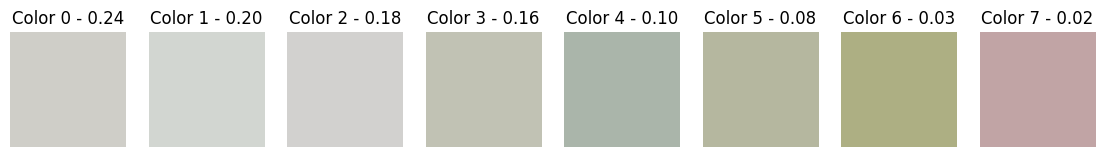

In [9]:
K = 8
N = K
cols = min(8, N)
rows = (N // cols) + 1
fig = plt.figure(figsize=(14, 7)) 
# centroids, weights, center_points = get_prominent_colors(red_img, K, weights=(10, 100, 100, 1, 1), resize=False, blur=True)
centroids, weights, center_points = grab_colors(red_img, K, weights=(5, 100, 100, 1, 1), resize=False, blur=5)
sorted_inx = np.argsort(weights)[::-1]
centroids = centroids[sorted_inx[:N]]
weights = weights[sorted_inx[:N]]
center_points = center_points[sorted_inx[:N]]
for i in range(len(weights)):
    fig.add_subplot(rows, cols, i+1) 
    plt.title(f'Color {i} - {weights[i]:.2f}')
    hsv = [int(x) for x in centroids[i]][:3]
    # hsv = [int(x) for x in center_points[i]]
    square = np.full((5, 5, 3), hsv, dtype=np.uint8)
    plt.imshow(cv2.cvtColor(square, cv2.COLOR_LAB2RGB))
    plt.axis('off')